In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("sales_data_with_discounts.csv")
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


### Descriptive Analytics for Numerical Columns

In [3]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [4]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [5]:
data.mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [6]:
data.median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [7]:
mode_values = data.select_dtypes(include=['number']).mode().iloc[0]
mode_values

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [8]:
data.std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

### Data Visualization

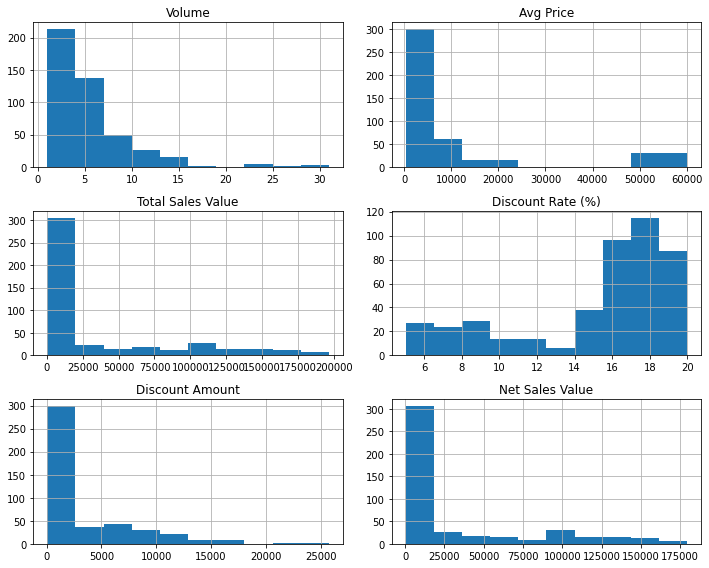

In [9]:
# Plot histogram for each numerical column
data.hist(figsize=(10, 8)) 
plt.tight_layout() 
plt.show()

In [10]:
skewness = data.skew()
skewness

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

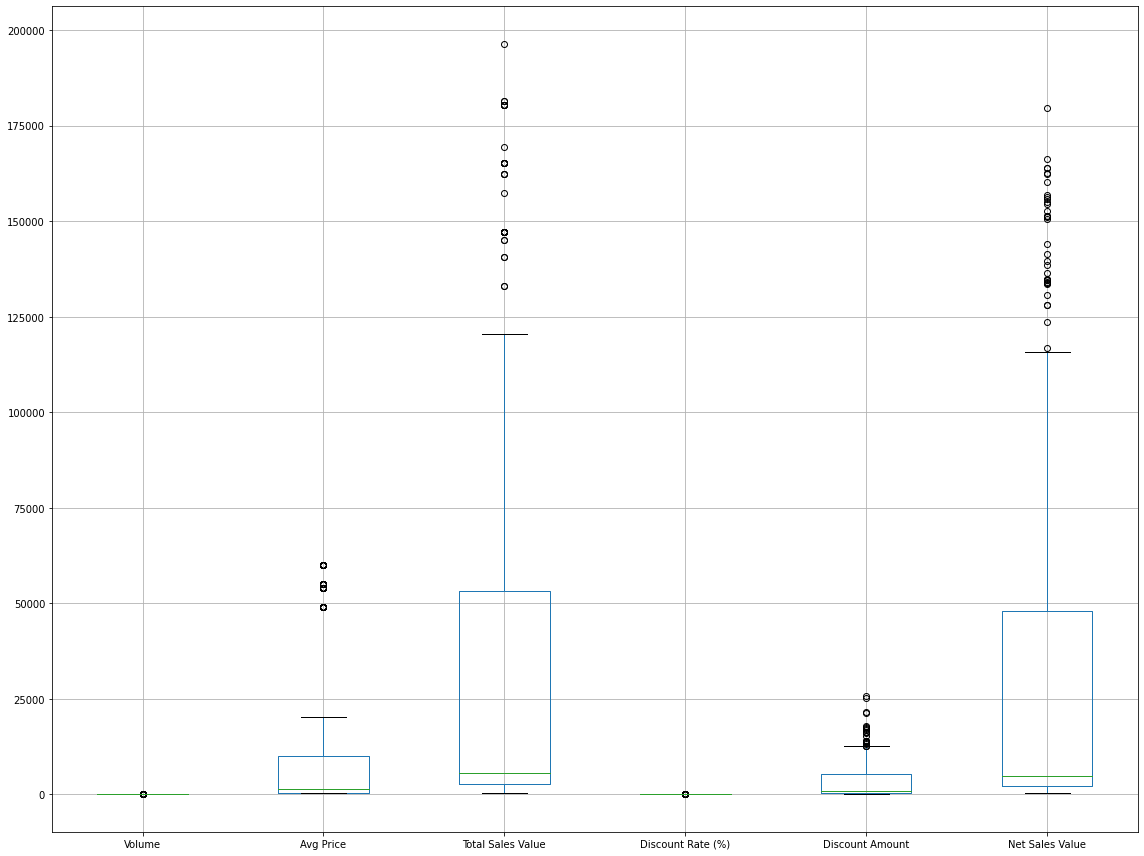

In [12]:
# Plot boxplot for each numerical column
data.boxplot(figsize=(16, 12)) 
plt.tight_layout() 
plt.show()

### Bar Chart for Categorical Columns

In [18]:
Categorical_columns = data.select_dtypes(include=['object']).columns
Categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

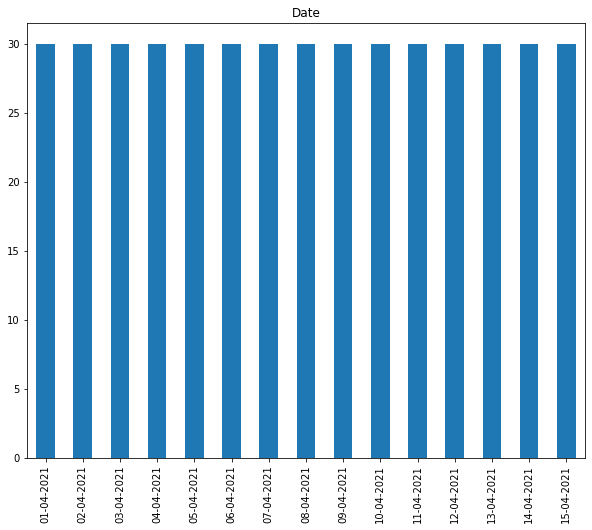

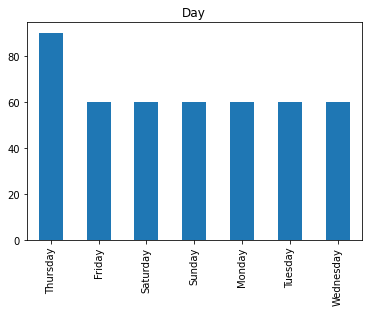

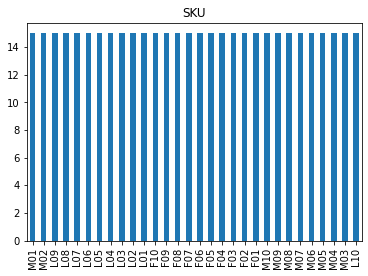

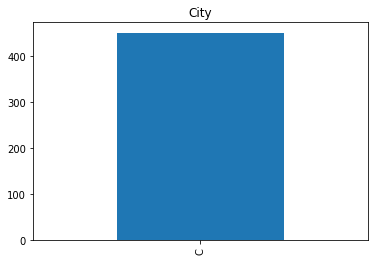

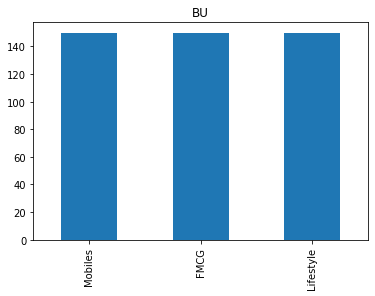

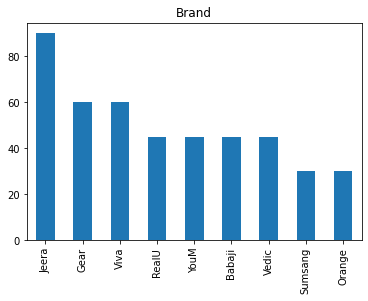

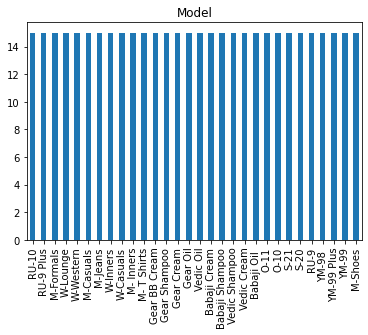

In [21]:
plt.figure(figsize=(10, 8))
for col in Categorical_columns:
    data[col].value_counts().plot(kind='bar', title=col)
    plt.show()

### Standardization of Numerical Variables

In [22]:
for col in numerical_columns:
    data[col + '_standardized'] = (data[col] - data[col].mean()) / data[col].std()

In [23]:
data[col + '_standardized']

0      2.801638
1      1.269613
2      1.543957
3      1.763847
4     -0.227342
         ...   
445   -0.609783
446   -0.378079
447   -0.601252
448   -0.554881
449   -0.600571
Name: Net Sales Value_standardized, Length: 450, dtype: float64

### Conversion of Categorical Data into Dummy Variables

In [27]:
# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=['SKU', 'City', 'BU', 'Brand', 'Model'])

In [28]:
# Display transformed DataFrame
print("\nTransformed DataFrame with One-Hot Encoding:")
print(data_encoded)


Transformed DataFrame with One-Hot Encoding:
           Date       Day  Volume  Avg Price  Total Sales Value  \
0    01-04-2021  Thursday      15      12100             181500   
1    01-04-2021  Thursday      10      10100             101000   
2    01-04-2021  Thursday       7      16100             112700   
3    01-04-2021  Thursday       6      20100             120600   
4    01-04-2021  Thursday       3       8100              24300   
..          ...       ...     ...        ...                ...   
445  15-04-2021  Thursday       2       1300               2600   
446  15-04-2021  Thursday       6       2600              15600   
447  15-04-2021  Thursday       2       1600               3200   
448  15-04-2021  Thursday       3       1900               5700   
449  15-04-2021  Thursday       1       3100               3100   

     Discount Rate (%)  Discount Amount  Net Sales Value  Volume_standardized  \
0            11.654820     21153.498820    160346.501180            